In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Introduction:
- The dataset includes data to predict the type of cancer, whether it is a benign or malignant cancer.
- The treatment includes many different methodologies and steps, the final results depend on comparing many different statistical and mathematical models, in addition to a final proposal for an algorithm capable of studying the collective work of many previous algorithms.
- The study also included many methodologies for the pre-processing of the data contained in the dataset, whether the process of compressing or re-distributing the data, and balancing the data contained in the dataset.

# Read Dataset

In [2]:
dataset_path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'

In [3]:
dataset = pd.read_csv(dataset_path)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
features = dataset.drop(['id', 'Unnamed: 32', 'diagnosis'], axis = 1)
labels = dataset['diagnosis']

In [8]:
np.unique(labels, return_counts = True)

(array(['B', 'M'], dtype=object), array([357, 212]))

# Under sampling Dataset
- The data is distributed unbalanced, and as we know we need balanced data in terms of number for each of the cases that we want to predict, in order not to make the algorithm focus on a specific case without the other.
- One method is to reduce the distribution of data to the class with the largest number of examples.
- The sampling process should not be done randomly, as the samples that have different samples should be chosen in order to make the algorithm able to learn and gain more experience from the diversity of examples.

In [9]:
from imblearn.under_sampling import AllKNN
features, labels = AllKNN(n_neighbors = 7).fit_resample(features, labels)

In [10]:
np.unique(labels, return_counts = True)

(array(['B', 'M'], dtype=object), array([274, 212]))

In [11]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [12]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
features = np.array(features)
labels = np.array(labels)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2,
                                               stratify = labels, random_state = True)

In [15]:
xtrain.shape, xtest.shape

((388, 30), (98, 30))

In [16]:
np.unique(ytest, return_counts = True)

(array([0, 1]), array([55, 43]))

In [17]:
def K_fold(xtrain, ytrain, estimator):
    fold_k = StratifiedKFold(n_splits = 20).split(xtrain, ytrain)
    xtrain_f, xvalid_f,ytrain_f, yvalid_f = [], [], [], []
    for k , (train, valid) in enumerate(fold_k):
        xtrain_f.append(xtrain[train]), xvalid_f.append(xtrain[valid])
        ytrain_f.append(ytrain[train]), yvalid_f.append(ytrain[valid])
        estimator.fit(xtrain[train], ytrain[train])
        st = 'k: {}, train acc: {}, and validation acc: {}'.format(k, estimator.score(xtrain[train], ytrain[train]),
                                                           estimator.score(xtrain[valid], ytrain[valid]))
        print(st)
    return xtrain_f, xvalid_f,ytrain_f, yvalid_f

# LogisticRegression Classifier

In [18]:
logistic_regression_pipe = make_pipeline(
    RobustScaler(),
    KernelPCA(kernel = 'rbf', n_components = 20),
    LogisticRegression(solver = 'lbfgs',C = 100, random_state = 1, multi_class = 'ovr',
                      class_weight = 'balanced', max_iter = 3000)
)

In [19]:
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 1000]
train_scores , validation_scores = validation_curve(estimator = logistic_regression_pipe, 
                                                   X = xtrain, y = ytrain, 
                                                   param_name = 'logisticregression__C',
                                                   param_range = param_range,
                                                   scoring = 'accuracy',
                                                   cv = 10)

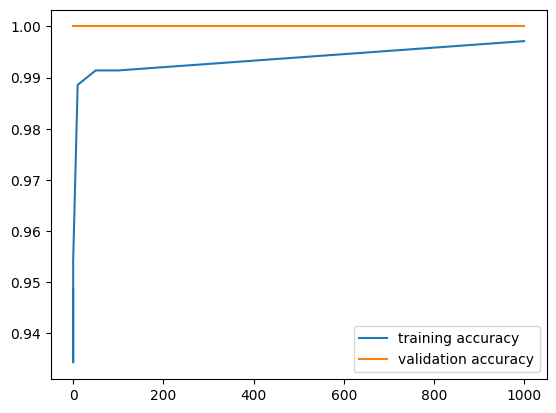

In [20]:
import matplotlib.pyplot as plt
plt.plot(param_range, np.max(train_scores, axis = 1), label = 'training accuracy')
plt.plot(param_range, np.max(validation_scores, axis = 1), label = 'validation accuracy')
plt.legend()

In [21]:
logisticregression_search = GridSearchCV(
                                        scoring = 'accuracy', 
                                        estimator = logistic_regression_pipe,
                                        param_grid = [{
                                            'logisticregression__solver': ['lbfgs', 'liblinear'],
                                            'logisticregression__C': param_range
                                        }],
                                        cv = 10)
logisticregression_search.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('kernelpca',
                                        KernelPCA(kernel='rbf',
                                                  n_components=20)),
                                       ('logisticregression',
                                        LogisticRegression(C=100,
                                                           class_weight='balanced',
                                                           max_iter=3000,
                                                           multi_class='ovr',
                                                           random_state=1))]),
             param_grid=[{'logisticregression__C': [1e-05, 0.0001, 0.001, 0.01,
                                                    0.1, 10, 50, 100, 1000],
                          'logisticregression__solver': ['lbfgs',
                                                         'liblinear']}],
             scoring='accuracy')

In [22]:
logisticregression_search.best_score_

0.9793522267206478

In [23]:
logisticregression_search.best_params_

{'logisticregression__C': 1000, 'logisticregression__solver': 'lbfgs'}

In [24]:
logistic_regression_pipe = logisticregression_search.best_estimator_

In [25]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain, 
                                               ytrain, 
                                               logistic_regression_pipe)

k: 0, train acc: 0.9945652173913043, and validation acc: 1.0
k: 1, train acc: 0.9945652173913043, and validation acc: 0.95
k: 2, train acc: 0.9945652173913043, and validation acc: 1.0
k: 3, train acc: 0.9945652173913043, and validation acc: 1.0
k: 4, train acc: 0.9972826086956522, and validation acc: 0.95
k: 5, train acc: 0.9945652173913043, and validation acc: 1.0
k: 6, train acc: 0.9918478260869565, and validation acc: 1.0
k: 7, train acc: 0.9945652173913043, and validation acc: 1.0
k: 8, train acc: 0.994579945799458, and validation acc: 1.0
k: 9, train acc: 0.994579945799458, and validation acc: 0.9473684210526315
k: 10, train acc: 0.994579945799458, and validation acc: 0.9473684210526315
k: 11, train acc: 0.994579945799458, and validation acc: 1.0
k: 12, train acc: 0.997289972899729, and validation acc: 1.0
k: 13, train acc: 0.994579945799458, and validation acc: 1.0
k: 14, train acc: 0.994579945799458, and validation acc: 1.0
k: 15, train acc: 0.994579945799458, and validation acc

In [26]:
index = 3
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
logistic_regression_pipe.fit(xtrain, ytrain)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kernelpca', KernelPCA(kernel='rbf', n_components=20)),
                ('logisticregression',
                 LogisticRegression(C=1000, class_weight='balanced',
                                    max_iter=3000, multi_class='ovr',
                                    random_state=1))])

In [27]:
len(xtraining), len(xvalid)

(368, 20)

In [28]:
logistic_regression_pipe.score(xtraining, ytraining)

0.9945652173913043

In [29]:
logistic_regression_pipe.score(xvalid, yvalid)

1.0

In [30]:
logistic_regression_pipe.score(xtest, ytest)

1.0

In [31]:
y_pred = logistic_regression_pipe.predict(xtest)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [32]:
accuracy_score(y_pred, ytest)*100

100.0

In [33]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        43

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



<AxesSubplot: >

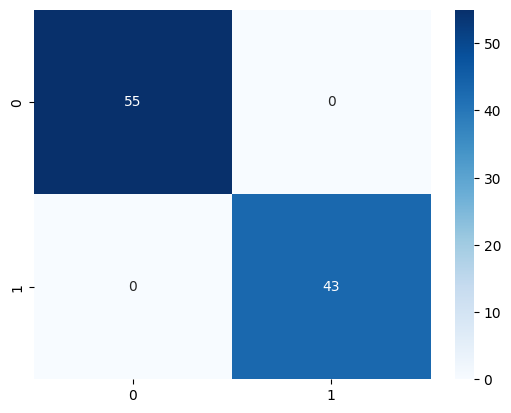

In [34]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

# Support Vector Machine

In [35]:
svm_pipeline = make_pipeline(RobustScaler(),
                            KernelPCA(n_components = 12, kernel = 'rbf'),
                            SVC(kernel = 'rbf', gamma = 5, C = 100, 
                               random_state = 1, probability=True))

In [36]:
train_scores, validation_scores = validation_curve(estimator = svm_pipeline,
                                                  X = xtrain, y = ytrain, 
                                                  scoring = 'accuracy',
                                                  param_name = 'svc__C',
                                                  param_range = param_range,
                                                  cv = 10)

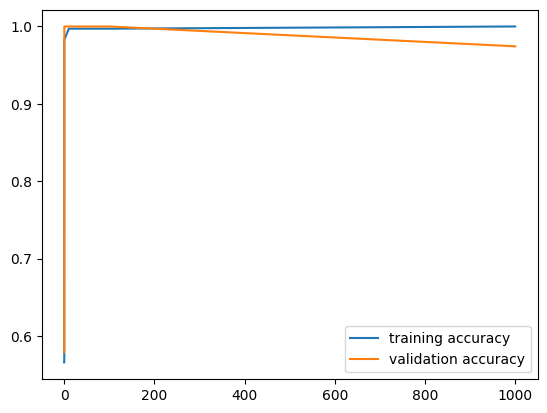

In [37]:
plt.plot(param_range, np.max(train_scores, axis = 1), label = 'training accuracy')
plt.plot(param_range, np.max(validation_scores, axis = 1), label = 'validation accuracy')
plt.legend()

In [38]:
from sklearn.model_selection import cross_val_score
search_for_best = GridSearchCV(estimator = svm_pipeline, 
                              param_grid = [{
                                  'svc__kernel': ['rbf', 'linear'],
                                  'svc__C': param_range,
                                  'svc__gamma': param_range
                                  
                              }],
                              scoring = 'accuracy', cv = 10)
search_for_best.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('kernelpca',
                                        KernelPCA(kernel='rbf',
                                                  n_components=12)),
                                       ('svc',
                                        SVC(C=100, gamma=5, probability=True,
                                            random_state=1))]),
             param_grid=[{'svc__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 50,
                                     100, 1000],
                          'svc__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10,
                                         50, 100, 1000],
                          'svc__kernel': ['rbf', 'linear']}],
             scoring='accuracy')

In [39]:
search_for_best.best_score_

0.9819163292847504

In [40]:
search_for_best.best_params_

{'svc__C': 100, 'svc__gamma': 1e-05, 'svc__kernel': 'linear'}

In [41]:
svm_pipeline = search_for_best.best_estimator_

In [42]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain, 
                                               ytrain, 
                                               svm_pipeline)

k: 0, train acc: 0.9864130434782609, and validation acc: 1.0
k: 1, train acc: 0.9891304347826086, and validation acc: 0.95
k: 2, train acc: 0.9864130434782609, and validation acc: 1.0
k: 3, train acc: 0.9864130434782609, and validation acc: 1.0
k: 4, train acc: 0.9891304347826086, and validation acc: 0.9
k: 5, train acc: 0.9864130434782609, and validation acc: 1.0
k: 6, train acc: 0.9864130434782609, and validation acc: 1.0
k: 7, train acc: 0.9864130434782609, and validation acc: 1.0
k: 8, train acc: 0.983739837398374, and validation acc: 1.0
k: 9, train acc: 0.989159891598916, and validation acc: 0.9473684210526315
k: 10, train acc: 0.989159891598916, and validation acc: 0.9473684210526315
k: 11, train acc: 0.986449864498645, and validation acc: 1.0
k: 12, train acc: 0.986449864498645, and validation acc: 1.0
k: 13, train acc: 0.986449864498645, and validation acc: 1.0
k: 14, train acc: 0.986449864498645, and validation acc: 1.0
k: 15, train acc: 0.986449864498645, and validation acc:

In [43]:
index = 18
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
svm_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kernelpca', KernelPCA(kernel='rbf', n_components=12)),
                ('svc',
                 SVC(C=100, gamma=1e-05, kernel='linear', probability=True,
                     random_state=1))])

In [44]:
len(xtraining), len(xvalid)

(369, 19)

In [45]:
svm_pipeline.score(xtraining, ytraining), svm_pipeline.score(xvalid, yvalid)

(0.986449864498645, 1.0)

In [46]:
svm_pipeline.score(xtest, ytest)

1.0

In [47]:
y_pred = svm_pipeline.predict(xtest)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [48]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        43

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



<AxesSubplot: >

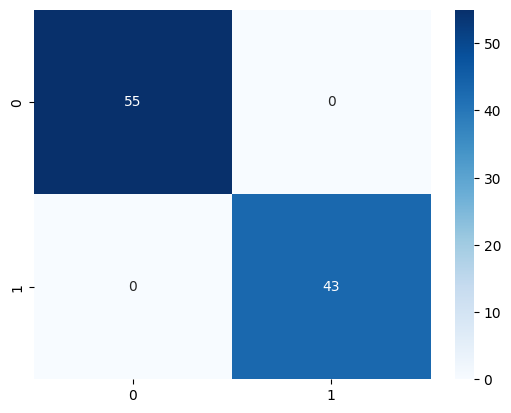

In [49]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

# KNN Classifier

In [50]:
from sklearn.feature_selection import SelectFromModel

In [51]:
knn_pipeline = make_pipeline(
                            SelectFromModel(estimator = RandomForestClassifier(
                            n_estimators = 1000, max_depth = 2), threshold = 0.05),
                            RobustScaler(),
                            KNeighborsClassifier(metric = 'minkowski',
                                                 n_neighbors = 3, 
                                                 p = 2))

In [52]:
search_for_best_knn_params = GridSearchCV(
                                         scoring = 'accuracy',
                                         estimator = knn_pipeline,
                                         param_grid = [{
                                             'kneighborsclassifier__n_neighbors':[2, 3, 4, 5, 6, 7, 8],
                                             'kneighborsclassifier__p': [1, 2]
                                         }],
                                         cv = 10)
search_for_best_knn_params.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier(max_depth=2,
                                                                                         n_estimators=1000),
                                                        threshold=0.05)),
                                       ('robustscaler', RobustScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid=[{'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6,
                                                                7, 8],
                          'kneighborsclassifier__p': [1, 2]}],
             scoring='accuracy')

In [53]:
search_for_best_knn_params.best_score_

0.9871120107962212

In [54]:
search_for_best_knn_params.best_params_

{'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 2}

In [55]:
knn_pipeline = search_for_best_knn_params.best_estimator_

In [56]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain, 
                                               ytrain, 
                                               knn_pipeline)

k: 0, train acc: 0.9864130434782609, and validation acc: 1.0
k: 1, train acc: 0.9891304347826086, and validation acc: 0.95
k: 2, train acc: 0.9864130434782609, and validation acc: 1.0
k: 3, train acc: 0.9864130434782609, and validation acc: 1.0
k: 4, train acc: 0.9918478260869565, and validation acc: 0.9
k: 5, train acc: 0.9864130434782609, and validation acc: 1.0
k: 6, train acc: 0.9864130434782609, and validation acc: 1.0
k: 7, train acc: 0.9864130434782609, and validation acc: 1.0
k: 8, train acc: 0.986449864498645, and validation acc: 1.0
k: 9, train acc: 0.986449864498645, and validation acc: 1.0
k: 10, train acc: 0.986449864498645, and validation acc: 1.0
k: 11, train acc: 0.986449864498645, and validation acc: 1.0
k: 12, train acc: 0.989159891598916, and validation acc: 0.9473684210526315
k: 13, train acc: 0.986449864498645, and validation acc: 1.0
k: 14, train acc: 0.986449864498645, and validation acc: 1.0
k: 15, train acc: 0.986449864498645, and validation acc: 1.0
k: 16, tra

In [57]:
index = 16
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
knn_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=2,
                                                                  n_estimators=1000),
                                 threshold=0.05)),
                ('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [58]:
knn_pipeline.score(xtraining, ytraining), knn_pipeline.score(xvalid, yvalid)

(0.986449864498645, 1.0)

In [59]:
knn_pipeline.score(xtest, ytest)

0.9795918367346939

In [60]:
y_pred = knn_pipeline.predict(xtest)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [61]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.98      0.98      0.98        43

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



<AxesSubplot: >

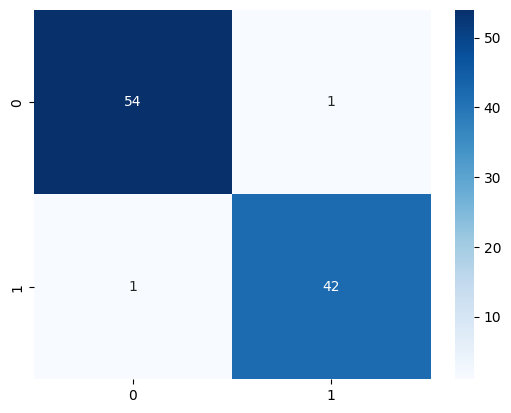

In [62]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

# Majority Voting Classifier

- The proposed final methodology to deal with teamwork in the ability to predict accurately, through the use of several pre-trained models.
- The methodology depends on the fact that each model has a degree of importance in determining the final decision, and therefore, we work on weighing each previously trained model. The process of weighing the pre-trained models must be accurate, so that the largest weight is given to the model that was able to reach accuracy. higher (as we seek to support his decision and fix the error he makes, by providing other models that can correct what he does).

- weights = [weightModel_1, weightModel_2, weightModel_3]
- P(y= 0 | x) =  weightModel_1 * P_m1(y= 0 | x) + weightModel_2 * P_m2(y= 0 | x) + weightModel_3 * P_m3(y= 0 | x)

- P(y= 1 | x) =  weightModel_1 * P_m1(y= 1 | x) + weightModel_2 * P_m2(y= 1 | x) + weightModel_3 * P_m3(y= 1 | x)

In [63]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import _name_estimators
class MajorityVoting:
    def __init__(self, classifiers, weights):
        self.classifiers = classifiers
        self.weights = weights   
    def fit(self, features, labels):
        return self
    def predict_proba(self, x):
        predicts_ = np.array([classifier.predict_proba(x) for classifier in self.classifiers])
        weighted_predict_proba = np.average(predicts_, 
                                           axis = 0,
                                           weights = self.weights)
        return weighted_predict_proba
    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis = 1)
    def score(self, features, labels):
        y_pred = np.argmax(self.predict_proba(features), axis = 1)
        return accuracy_score(labels, y_pred)

In [64]:
def get_proba(estimator, data):
    y_pred = estimator.predict_proba(data)
    y_pred_indexs = np.argmax(y_pred, axis = 1)
    return [y_pred[index, value] for index, value in enumerate(y_pred_indexs)]

In [65]:
xtrain_up = np.vstack([
    get_proba(logistic_regression_pipe, xtrain),
    get_proba(svm_pipeline, xtrain),
    get_proba(knn_pipeline, xtrain)
])
xtrain_up = np.reshape(xtrain_up, (xtrain_up.shape[1], xtrain_up.shape[0]))
xtrain_up.shape

(388, 3)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
boost = AdaBoostClassifier(estimator = DecisionTreeClassifier(criterion = 'gini'), 
                           random_state = 1,)
boost.fit(xtrain_up, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [67]:
boost.score(xtrain_up, ytrain)

0.8479381443298969

In [87]:
features_importances = np.mean([tree.feature_importances_ for tree in boost.estimators_], axis = 0)/3
features_importances

array([0.09853632, 0.14804373, 0.08675328])

In [88]:
features_importances = np.mean([[0.6, 0.1, 0.1], features_importances], axis = 0)
features_importances

array([0.34926816, 0.12402187, 0.09337664])

In [89]:
majority_vote = MajorityVoting([
                                logistic_regression_pipe, 
                                svm_pipeline, 
                                knn_pipeline,],
                                weights = features_importances)

In [90]:
xtrain_f, xvalid_f,ytrain_f, yvalid_f = K_fold(xtrain, 
                                               ytrain, 
                                               majority_vote)

k: 0, train acc: 0.9945652173913043, and validation acc: 1.0
k: 1, train acc: 0.9945652173913043, and validation acc: 1.0
k: 2, train acc: 0.9945652173913043, and validation acc: 1.0
k: 3, train acc: 0.9945652173913043, and validation acc: 1.0
k: 4, train acc: 0.9972826086956522, and validation acc: 0.95
k: 5, train acc: 0.9945652173913043, and validation acc: 1.0
k: 6, train acc: 0.9945652173913043, and validation acc: 1.0
k: 7, train acc: 0.9945652173913043, and validation acc: 1.0
k: 8, train acc: 0.994579945799458, and validation acc: 1.0
k: 9, train acc: 0.997289972899729, and validation acc: 0.9473684210526315
k: 10, train acc: 0.994579945799458, and validation acc: 1.0
k: 11, train acc: 0.994579945799458, and validation acc: 1.0
k: 12, train acc: 0.994579945799458, and validation acc: 1.0
k: 13, train acc: 0.994579945799458, and validation acc: 1.0
k: 14, train acc: 0.994579945799458, and validation acc: 1.0
k: 15, train acc: 0.994579945799458, and validation acc: 1.0
k: 16, tra

In [91]:
index = 16
xtraining, ytraining, xvalid, yvalid = xtrain_f[index], ytrain_f[index], xvalid_f[index], yvalid_f[index]
majority_vote.fit(xtrain, ytrain)

In [92]:
majority_vote.score(xtraining, ytraining), majority_vote.score(xvalid, yvalid)

(0.994579945799458, 1.0)

In [93]:
majority_vote.score(xtest, ytest)

1.0

In [94]:
y_pred = majority_vote.predict(xtest)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [95]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        43

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



<AxesSubplot: >

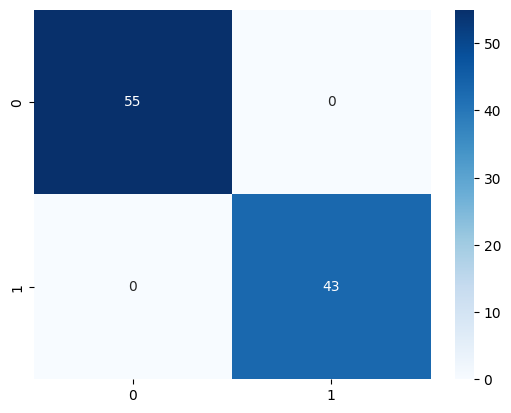

In [96]:
sns.heatmap(confusion_matrix(y_pred, ytest), annot = True, cmap = 'Blues')

- We note that the proposed collective model provided a better result than the rest of the algorithms on the test data, except for the LogisticRegression algorithm, as shown in the following table.
- But if we review the result and accuracy of the individual models and the collective work model on all the data contained in the dataset, we will notice that the proposed collective model is the best in terms of accuracy.
- The proposed group model performed better on both training, test and validation data in contrast to the other individual algorithms.
- We can see that the performance of the algorithm group work its accuracy increases with the increase of the accuracy of the individual algorithms.
- We can also be sure that increasing the number of individual algorithms will lead to an increase in the accuracy of the collective model.

## Final Result - For Testing Data:

In [97]:
res = pd.DataFrame({
    'Models Used': ['LogisticRegression', 
                    'KNN Classification', 
                    'Support Vector Machine', 
                    'Majority Voting'],
    'Testing Data Accuracy': [logistic_regression_pipe.score(xtest, ytest)*100,
                             knn_pipeline.score(xtest, ytest)*100,
                             svm_pipeline.score(xtest, ytest)*100,
                             majority_vote.score(xtest, ytest)*100]
})
res.head()

,Models Used,Testing Data Accuracy
0,LogisticRegression,100.000000
1,KNN Classification,97.959184
2,Support Vector Machine,100.000000
3,Majority Voting,100.000000


## Final Result - For All Data in Dataset:

In [98]:
res = pd.DataFrame({
    'Models Used': ['LogisticRegression', 
                    'KNN Classification', 
                    'Support Vector Machine', 
                    'Majority Voting'],
    'All Data Accuracy': [logistic_regression_pipe.score(features, labels)*100,
                             knn_pipeline.score(features, labels)*100,
                             svm_pipeline.score(features, labels)*100,
                             majority_vote.score(features, labels)*100]
})
res.head()

,Models Used,All Data Accuracy
0,LogisticRegression,99.588477
1,KNN Classification,98.559671
2,Support Vector Machine,98.971193
3,Majority Voting,99.588477
